# Modelos de regresión lineal
## Modelo con datos simulados
* y = a + b*x
* x = 100 valores distribuidos según una N(1.5,2.5)
* ye = 5 + 1.9 * x

* e estará distribuido según una N (0,0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 1.9 * x

In [5]:
y_act = 5 +1.9 *x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [15]:
data = pd.DataFrame(
    
    {
        "x" : x_list,
        "y_actual" : y_act_list,
        "y_prediccion" : y_pred_list
        
        
        
    }



)

In [16]:
data.head()

,x,y_actual,y_prediccion
0,3.212715,10.820414,11.104159
1,1.975507,10.090960,8.753463
2,-0.743023,3.340604,3.588255
3,5.530609,16.040868,15.508157
4,2.075061,10.279532,8.942617


In [9]:
# comprobaremos que tan preciso fue el modelo 

import matplotlib.pyplot as plt


In [11]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor actual vs predicción')

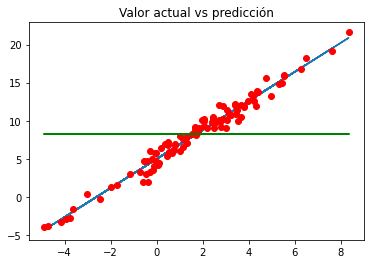

In [12]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor actual vs predicción")

In [13]:
# SSD = suma de los cuadrados de la diferencia
# SST = suma de los cuadrados totales
# SSR = suma de los cuadrados de la regresión

# SST = SSR + SSD


# R^2 = SSR / SST   # es un indicador de que el modelo de regresion ha sido efectivo

In [18]:
data["SSR"] = (data["y_prediccion"] - np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"] - data["y_actual"])**2
data["SST"] = (data["y_actual"] - np.mean(y_act))**2

In [19]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,3.212715,10.820414,11.104159,8.059125,0.080511,6.528616
1,1.975507,10.090960,8.753463,0.238304,1.788898,3.333039
2,-0.743023,3.340604,3.588255,21.874734,0.061331,24.252619
3,5.530609,16.040868,15.508157,52.458993,0.283781,60.459473
4,2.075061,10.279532,8.942617,0.458760,1.787342,4.057134


In [20]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [21]:
SSR

2389.8903390689948

In [22]:
SSD

68.83825465219637

In [23]:
SST

2486.675334279242

In [24]:
SSR + SSD

2458.728593721191

In [25]:
R2 = SSR/SST

In [26]:
R2

0.9610785558226883

(array([ 4.,  7., 14., 22., 19., 18.,  5.,  7.,  3.,  1.]),
 array([-1.93369997, -1.50075993, -1.06781988, -0.63487983, -0.20193978,
         0.23100027,  0.66394032,  1.09688036,  1.52982041,  1.96276046,
         2.39570051]),
 <BarContainer object of 10 artists>)

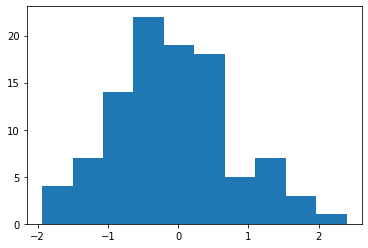

In [29]:
plt.hist(data["y_prediccion"] - data["y_actual"])

## Obteniendo la recta de regresión

* b=sum((xi - x_m)*(y_i_m))/su,(xi-x_m)^2)
* a = y_n - b * x_m

In [31]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.6838633923161277, 8.26529871457293)

In [33]:
data["beta_n"] = (data["x"] - x_mean)*(data["y_actual"] - y_mean)
data["beta_d"] = (data["x"] - x_mean)**2

In [35]:
beta = sum(data["beta_n"]) / sum(data["beta_d"])

In [36]:
alpha = y_mean - beta * x_mean

In [37]:
alpha, beta

(5.046666240650779, 1.9114570033469118)

El modelo lineal obtenido por regresion es : y = 5.046666240650779 + 1.9114570033469118 * x

In [38]:
data["y_model"] = alpha + beta * data["x"]

In [39]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,3.212715,10.820414,11.104159,8.059125,0.080511,6.528616,3.906393,2.337387,11.187633
1,1.975507,10.090960,8.753463,0.238304,1.788898,3.333039,0.532442,0.085056,8.822763
2,-0.743023,3.340604,3.588255,21.874734,0.061331,24.252619,11.951677,5.889780,3.626409
3,5.530609,16.040868,15.508157,52.458993,0.283781,60.459473,29.910634,14.797450,15.618187
4,2.075061,10.279532,8.942617,0.458760,1.787342,4.057134,0.787964,0.153036,9.013057


In [40]:
SSR = sum((data["y_prediccion"] - np.mean(y_act))**2)
SSD = sum((data["y_prediccion"] - data["y_actual"])**2)
SST = sum((data["y_actual"] - np.mean(y_act))**2)

In [41]:
SSR, SSD, SST

(2389.8903390689948, 68.83825465219637, 2486.675334279242)

In [42]:
R2 = SSR/SST
R2

0.9610785558226883

(array([ 4.,  7., 14., 22., 19., 18.,  5.,  7.,  3.,  1.]),
 array([-1.93369997, -1.50075993, -1.06781988, -0.63487983, -0.20193978,
         0.23100027,  0.66394032,  1.09688036,  1.52982041,  1.96276046,
         2.39570051]),
 <BarContainer object of 10 artists>)

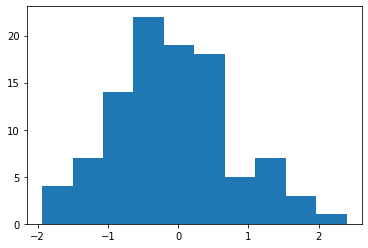

In [43]:
plt.hist(data["y_prediccion"] - data["y_actual"])

Text(0.5, 1.0, 'Valor actual vs predicción')

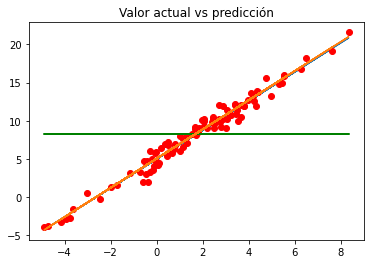

In [46]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"], data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor actual vs predicción")

# Error estandar de los residuos (RSE)

In [47]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.8381116691231373

In [48]:
np.mean(data["y_actual"])

8.26529871457293

In [49]:
RSE / np.mean(data["y_actual"])

0.10140125578830246